In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


50.0


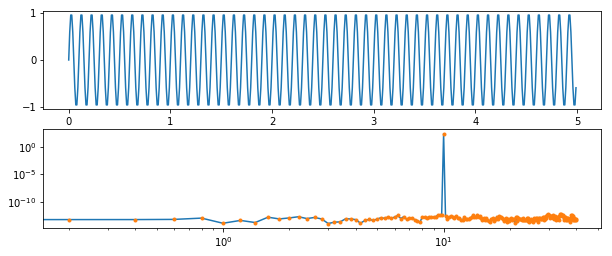

In [2]:
step = 0.01
f = 10*2*pi
time = 5
t = arange(0,time,step)
wave = sin(f*t)


sp = fft.fft(wave)
freq = fft.fftfreq(len(sp),step)
fig,ax = subplots(2,1,figsize = [10,4])
ax[0].plot(t,wave)
ax[1].loglog(freq[0:200],abs(sp[0:200]))
ax[1].loglog(freq[0:200],abs(sp[0:200]),'.')

period = f*time/(2*pi)
print(period)

In [3]:
###https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [4]:
x = np.random.random(1024)
np.allclose(DFT_slow(wave), np.fft.fft(wave))

True

In [5]:
%timeit DFT_slow(wave)
%timeit np.fft.fft(wave)

26.7 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.4 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


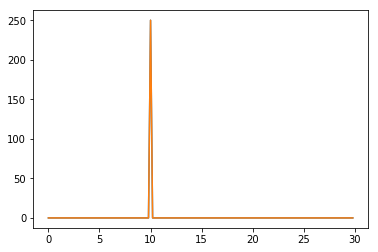

In [6]:
sp_dft = DFT_slow(wave)
plot(freq[0:150],abs(sp[0:150]))
plot(freq[0:150],abs(sp_dft[0:150]))